In [2]:
import pandas as pd 
df = pd.read_excel('Data.xlsx')

In [3]:
df

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度
0,2000,900,0,0,92.6
1,2000,900,500,0,96.1
2,2000,900,1000,0,95.6
3,2000,900,1500,0,93.9
4,2000,900,2000,0,93.9
...,...,...,...,...,...
21835,3500,1800,2500,5400,92.9
21836,3500,1800,3000,5400,92.6
21837,3500,1800,3500,5400,92.3
21838,3500,1800,4000,5400,91.0


In [4]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1].values,test_size = 0.2,random_state = 0)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train).reshape(-1,1)
y_test = torch.tensor(y_test).reshape(-1,1)

In [6]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x_train_std = torch.tensor(x_scaler.fit_transform(x_train))
y_train_std = torch.tensor(y_scaler.fit_transform(y_train))

In [7]:
# 定义神经网络模型
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNet, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.output(out)
        return out

input_size = 4
hidden_size1 = 10
hidden_size2 = 5
output_size = 1

model = NeuralNet(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
nn.SmoothL1Loss

In [148]:
# 定义损失函数和优化器
model2 = NeuralNet(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.01)
x_train_std = x_train_std.float()
y_train_std = y_train_std.float()
# 训练模型
num_epochs = 10000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model2(x_train_std)
    
    # 计算损失
    loss = criterion(outputs, y_train_std)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [10/10000], Loss: 0.4030
Epoch [20/10000], Loss: 0.1982
Epoch [30/10000], Loss: 0.1016
Epoch [40/10000], Loss: 0.0627
Epoch [50/10000], Loss: 0.0486
Epoch [60/10000], Loss: 0.0438
Epoch [70/10000], Loss: 0.0423
Epoch [80/10000], Loss: 0.0418
Epoch [90/10000], Loss: 0.0416
Epoch [100/10000], Loss: 0.0415
Epoch [110/10000], Loss: 0.0414
Epoch [120/10000], Loss: 0.0414
Epoch [130/10000], Loss: 0.0413
Epoch [140/10000], Loss: 0.0413
Epoch [150/10000], Loss: 0.0413
Epoch [160/10000], Loss: 0.0412
Epoch [170/10000], Loss: 0.0412
Epoch [180/10000], Loss: 0.0411
Epoch [190/10000], Loss: 0.0411
Epoch [200/10000], Loss: 0.0410
Epoch [210/10000], Loss: 0.0410
Epoch [220/10000], Loss: 0.0409
Epoch [230/10000], Loss: 0.0409
Epoch [240/10000], Loss: 0.0409
Epoch [250/10000], Loss: 0.0408
Epoch [260/10000], Loss: 0.0408
Epoch [270/10000], Loss: 0.0407
Epoch [280/10000], Loss: 0.0407
Epoch [290/10000], Loss: 0.0407
Epoch [300/10000], Loss: 0.0406
Epoch [310/10000], Loss: 0.0406
Epoch [320/10000]

In [129]:
# 定义损失函数和优化器
model = NeuralNet(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
x_train_std = x_train_std.float()
y_train_std = y_train_std.float()
# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_std)
    
    # 计算损失
    loss = criterion(outputs, y_train_std)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [10/1000], Loss: 0.2554
Epoch [20/1000], Loss: 0.1092
Epoch [30/1000], Loss: 0.0657
Epoch [40/1000], Loss: 0.0544
Epoch [50/1000], Loss: 0.0516
Epoch [60/1000], Loss: 0.0509
Epoch [70/1000], Loss: 0.0505
Epoch [80/1000], Loss: 0.0503
Epoch [90/1000], Loss: 0.0501
Epoch [100/1000], Loss: 0.0499
Epoch [110/1000], Loss: 0.0497
Epoch [120/1000], Loss: 0.0495
Epoch [130/1000], Loss: 0.0493
Epoch [140/1000], Loss: 0.0491
Epoch [150/1000], Loss: 0.0489
Epoch [160/1000], Loss: 0.0488
Epoch [170/1000], Loss: 0.0486
Epoch [180/1000], Loss: 0.0484
Epoch [190/1000], Loss: 0.0483
Epoch [200/1000], Loss: 0.0481
Epoch [210/1000], Loss: 0.0479
Epoch [220/1000], Loss: 0.0478
Epoch [230/1000], Loss: 0.0477
Epoch [240/1000], Loss: 0.0475
Epoch [250/1000], Loss: 0.0474
Epoch [260/1000], Loss: 0.0472
Epoch [270/1000], Loss: 0.0471
Epoch [280/1000], Loss: 0.0470
Epoch [290/1000], Loss: 0.0468
Epoch [300/1000], Loss: 0.0467
Epoch [310/1000], Loss: 0.0466
Epoch [320/1000], Loss: 0.0465
Epoch [330/1000],

In [ ]:
nn.

In [149]:
model2(x_train_std[3909])

tensor([0.7150], grad_fn=<AddBackward0>)

In [141]:
y_train_std[3909]

tensor([0.])

In [86]:
x_train_std[3909]

tensor([0.6667, 0.8000, 0.2222, 0.3000])

In [83]:
y_train_std.argmin()

tensor(3909)

In [57]:
torch.tensor(df.iloc[40].values[:-2]).reshape(1,-1)

tensor([[2000.,  900.,    0.,  240.]], dtype=torch.float64)

In [68]:
y_train_std

tensor([[0.9300],
        [0.9380],
        [0.9311],
        ...,
        [0.9724],
        [0.9357],
        [0.9736]])

In [72]:
import numpy as np 
y_scaler.inverse_transform(np.array([[0.9300]]))

array([[91.803]])

In [75]:
y_train.min()

tensor(10.8000, dtype=torch.float64)

In [76]:
y_train.max()

tensor(97.9000, dtype=torch.float64)

In [66]:
y_scaler.inverse_transform(model(torch.tensor(x_scaler.transform(df.iloc[40].values[:-2].reshape(1,-1))).float()).detach().numpy())

array([[76.28229]], dtype=float32)

In [23]:
model(x_scaler.transform(torch.tensor(df.iloc[40].values[:-2]).reshape(1,-1)))

NameError: name 'model' is not defined

In [42]:
y_scaler.inverse_transform(model(torch.tensor(x_scaler.fit_transform(df.iloc[:,:-1].values)).float()).detach().numpy())

(21840, 1)

In [43]:
df['BP预测'] = y_scaler.inverse_transform(model(torch.tensor(x_scaler.fit_transform(df.iloc[:,:-1].values)).float()).detach().numpy())

In [45]:
df.loc[df['BP']<60]

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度,BP预测
40,2000,900,0,240,24.9,76.282288
50,2000,900,0,300,53.5,76.313126
60,2000,900,0,360,23.0,76.343971
70,2000,900,0,420,53.7,76.374817
80,2000,900,0,480,49.7,76.405663
...,...,...,...,...,...,...
21671,3500,1800,500,4440,55.5,83.099487
21692,3500,1800,1000,4560,54.2,84.736725
21703,3500,1800,1500,4620,41.3,86.295197
21724,3500,1800,2000,4740,37.6,87.731491


In [77]:
df['BP预测'].min()

75.02344

In [154]:
import numpy as np
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_std,y_train_std)

/Users/wangyanju/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [152]:
y_train_std 

tensor([[0.9300],
        [0.9380],
        [0.9311],
        ...,
        [0.9724],
        [0.9357],
        [0.9736]])

In [171]:
svr.predict(x_train_std[3909].reshape(1,4))

array([0.3833307])

In [165]:
x_train_std[3909].reshape(1,4)

tensor([[0.6667, 0.8000, 0.2222, 0.3000]])

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(n_estimators = 1000,max_depth = 20)
rf.fit(x_train_std,y_train_std)

/var/folders/hv/t_w2v_x14993zdrc1zpqqy4w0000gp/T/ipykernel_35458/4021262873.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_std,y_train_std)


RandomForestRegressor(max_depth=20, n_estimators=1000)

In [174]:
x_train_std[3909].reshape(1,4)

tensor([[0.6667, 0.8000, 0.2222, 0.3000]])

In [9]:
df

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度
0,2000,900,0,0,92.6
1,2000,900,500,0,96.1
2,2000,900,1000,0,95.6
3,2000,900,1500,0,93.9
4,2000,900,2000,0,93.9
...,...,...,...,...,...
21835,3500,1800,2500,5400,92.9
21836,3500,1800,3000,5400,92.6
21837,3500,1800,3500,5400,92.3
21838,3500,1800,4000,5400,91.0


In [188]:
rf.predict(torch.tensor([[1, 0.8000, 0.2222, 0.3000]]))

array([0.06483845])

In [198]:
df['svr预测'] = y_scaler.inverse_transform(svr.predict(torch.tensor(x_scaler.fit_transform(df.iloc[:,:4].values))).reshape(-1,1))

In [10]:
df['rf预测'] = y_scaler.inverse_transform(rf.predict(torch.tensor(x_scaler.fit_transform(df.iloc[:,:4].values))).reshape(-1,1))

In [209]:
df.loc[df['当前时刻该位置的速度']<60]

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度,BP预测,svr预测,rf预测,gbdt预测
40,2000,900,0,240,24.9,76.282288,63.602977,35.493100,49.988418
50,2000,900,0,300,53.5,76.313126,63.789127,48.124601,52.371833
60,2000,900,0,360,23.0,76.343971,64.077569,48.616300,53.730498
70,2000,900,0,420,53.7,76.374817,64.464877,52.104501,53.526724
80,2000,900,0,480,49.7,76.405663,64.947233,50.837101,57.000448
...,...,...,...,...,...,...,...,...,...
21671,3500,1800,500,4440,55.5,83.099487,88.599514,67.048850,89.706615
21692,3500,1800,1000,4560,54.2,84.736725,88.680022,66.824887,89.706615
21703,3500,1800,1500,4620,41.3,86.295197,89.409797,88.453449,89.326621
21724,3500,1800,2000,4740,37.6,87.731491,89.132921,51.602200,88.732477


In [197]:
svr.predict(torch.tensor(x_scaler.fit_transform(df.iloc[:,:4].values))).reshape 

(21840,)

In [204]:
df.min()

事故发生前后方车流量      2000.000000
事故总处理时间          300.000000
观测位置距事故的距离         0.000000
当前时刻距事故发生的时长       0.000000
当前时刻该位置的速度        10.800000
BP预测              75.023438
svr预测             18.717278
rf预测              13.590829
dtype: float64

In [205]:
df

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度,BP预测,svr预测,rf预测
0,2000,900,0,0,92.6,76.158905,63.935245,89.793499
1,2000,900,500,0,96.1,77.544525,81.726365,95.394601
2,2000,900,1000,0,95.6,78.930138,95.180413,95.294001
3,2000,900,1500,0,93.9,80.315765,101.737500,93.976498
4,2000,900,2000,0,93.9,81.718567,101.440686,93.909198
...,...,...,...,...,...,...,...,...
21835,3500,1800,2500,5400,92.9,89.645767,82.462526,92.609299
21836,3500,1800,3000,5400,92.6,90.875793,84.489329,92.543799
21837,3500,1800,3500,5400,92.3,92.105835,87.552875,92.267800
21838,3500,1800,4000,5400,91.0,93.234848,90.890848,91.492900


In [206]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train_std,y_train_std)

/Users/wangyanju/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [207]:
df['gbdt预测'] = y_scaler.inverse_transform(gbdt.predict(torch.tensor(x_scaler.fit_transform(df.iloc[:,:4].values))).reshape(-1,1))

In [17]:
df.loc[(df['事故发生前后方车流量'] == 3000)&(df['事故总处理时间'] == 900)&(df['观测位置距事故的距离'] == 500)][:25]

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度,rf预测
12741,3000,900,500,0,91.9,91.535200
12751,3000,900,500,60,93.0,90.995900
12761,3000,900,500,120,90.4,89.282600
12771,3000,900,500,180,78.7,72.622200
12781,3000,900,500,240,39.6,47.153500
12791,3000,900,500,300,20.4,24.678500
12801,3000,900,500,360,16.8,21.298800
12811,3000,900,500,420,27.4,25.555200
12821,3000,900,500,480,21.9,22.565700
12831,3000,900,500,540,24.6,24.151700


In [210]:
df.to_csv('各模型预测结果.csv')

In [1]:
df

NameError: name 'df' is not defined

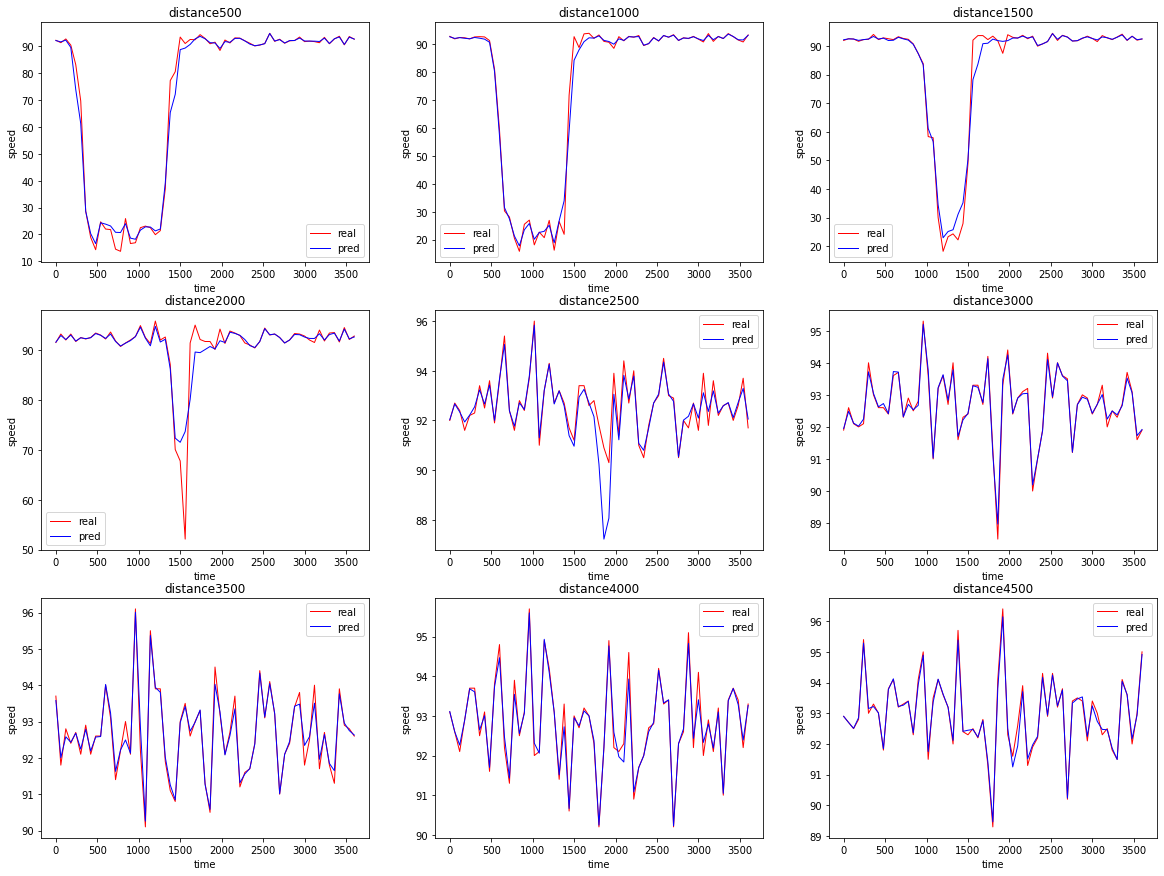

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
import matplotlib.dates as dates  
fig = plt.figure(figsize = (20,15)) 
tick_spacing = 180
for i in range(1,10):
    plt.subplot(330+i)
    df_part = df.loc[(df['事故发生前后方车流量'] == 2500)&(df['事故总处理时间'] == 1200)&(df['观测位置距事故的距离'] == i*500)][:61]
    plt.xlabel('time')
    plt.ylabel('speed')
    plt.plot(df_part['当前时刻距事故发生的时长'],df_part['当前时刻该位置的速度'],color = 'red',linewidth = 1 ,linestyle = '-',label = 'real')
    plt.plot(df_part['当前时刻距事故发生的时长'],df_part['rf预测'],color = 'blue',linewidth = 1 ,linestyle = '-',label = 'pred')
    plt.title('distance'+str(i*500))
    plt.legend()

In [13]:
df

,事故发生前后方车流量,事故总处理时间,观测位置距事故的距离,当前时刻距事故发生的时长,当前时刻该位置的速度,rf预测
0,2000,900,0,0,92.6,89.3124
1,2000,900,500,0,96.1,95.3531
2,2000,900,1000,0,95.6,95.2745
3,2000,900,1500,0,93.9,93.9828
4,2000,900,2000,0,93.9,93.9093
...,...,...,...,...,...,...
21835,3500,1800,2500,5400,92.9,92.6013
21836,3500,1800,3000,5400,92.6,92.5309
21837,3500,1800,3500,5400,92.3,92.2757
21838,3500,1800,4000,5400,91.0,91.4390


In [29]:
df.loc[(df['事故发生前后方车流量'] == 2500)&(df['事故总处理时间'] == 1200)&(df['当前时刻距事故发生的时长'] == 0)&(df['观测位置距事故的距离'] == 0),'当前时刻该位置的速度'].values[0] 

92.1

In [22]:
sorted(list(set(df['观测位置距事故的距离'])))

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

In [23]:
df_true = pd.DataFrame(index = sorted(list(set(df['当前时刻距事故发生的时长']))),columns = sorted(list(set(df['观测位置距事故的距离']))))

In [30]:
for ind in df_true.index :
    for dis in df_true.columns :
        df_true.loc[ind,dis] = df.loc[(df['事故发生前后方车流量'] == 2500)&(df['事故总处理时间'] == 1200)&(df['当前时刻距事故发生的时长'] == ind)&(df['观测位置距事故的距离'] == dis),'当前时刻该位置的速度'].values[0] 

In [36]:
df_true.index = [str(s)+'秒' for s in df_true.index] 

In [38]:
df_true.columns = [str(s)+'米' for s in df_true.columns] 

In [42]:
df_pred = pd.DataFrame(index = sorted(list(set(df['当前时刻距事故发生的时长']))),columns = sorted(list(set(df['观测位置距事故的距离']))))
for ind in df_pred.index :
    for dis in df_pred.columns :
        df_pred.loc[ind,dis] = df.loc[(df['事故发生前后方车流量'] == 2500)&(df['事故总处理时间'] == 1200)&(df['当前时刻距事故发生的时长'] == ind)&(df['观测位置距事故的距离'] == dis),'rf预测'].values[0] 

In [44]:
df_pred.index = [str(s)+'秒' for s in df_pred.index] 
df_pred.columns = [str(s)+'米' for s in df_pred.columns] 

In [48]:
df_pred.to_csv('df_pred.csv') 

In [47]:
df_true.to_csv('df_true.csv')